Danker Roozemond Astronomy 1694855 Stars Computer Opgave 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
%matplotlib inline

def read_in_data(fitsfile):
    hdulist = fits.open(fitsfile)
    cols_names = hdulist[1].columns.names #array
    print(hdulist[1].columns)
    data = hdulist[1].data
    hdulist.close()
    lijst = []
    for i in range(len(cols_names)):
        lijst.append(data.field(cols_names[i]))
    return(np.asarray(lijst))


data = read_in_data("SUPERNOVA(1).fits")

ColDefs(
    name = 'time'; format = 'E'; unit = 'ms'
    name = 'Rad'; format = 'E'; unit = 'cm'
    name = 'Den'; format = 'E'; unit = 'g/cm3'
    name = 'Ent'; format = 'E'; unit = '1.38x10-23 J/K'
    name = 'Ye'; format = 'E'
    name = 'Yl'; format = 'E'
    name = 'Enue'; format = 'E'; unit = 'MeV'
    name = 'Enuebar'; format = 'E'; unit = 'MeV'
    name = 'Lnue'; format = 'D'; unit = 'erg/s'
    name = 'Lnuebar'; format = 'D'; unit = 'erg/s'
    name = 'Rshock'; format = 'E'; unit = 'cm'
    name = 'Ekin'; format = 'D'; unit = 'erg'
    name = 'Eemit'; format = 'D'; unit = 'erg'
)


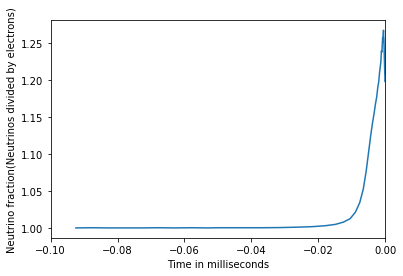

In [28]:
#Question 1

plt.plot(data[0][:],data[5][:]/data[4][:])
plt.xlim(-0.10,0)
plt.xlabel("Time in milliseconds")
plt.ylabel("Neutrino fraction(Neutrinos divided by electrons)")

Question 1: Reactions of electrons and positrons with neutrons and protons create a huge amount of neutrinos before the bounce and thus the electron amount decreases too.

Question 2: Because of the high temperature and pressure caused by the collapsing core the iron atoms are broken up to helium nuclei. Because of this the pressure goes down in the core causing that it collapses even more.

In [10]:
#Question 3

print(6.67408e-11*(1.5 * 1.989e30)**2. * (1./20000. - 1./(6.955e8*0.01))*1.0e7 )#Unit:erg
#This should be around 3e53

#Question 4

print(2.*10.**10 * 3.846e26*1.e7/400.*24.*60.*60./3.e53*100)#Unit: percent

2.9618484147129534e+53
5.538239999999999e-06


Question 3: The formula I use to calculate the gravitiational energy is $-\frac{GM^2}{R}$. From this I get 3.0 $*$ 10$^{53}$ erg.

Question 4: Dividing the bolometric luminosity by the period in seconds and by the gravitational energy I get 5.5 $*$ 10$^{-6}$ %.

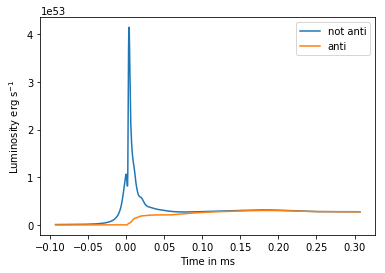

In [29]:
#Question 5

#print(data[1][:]/500e6)
plt.plot(data[0][:],data[8][:], label='not anti')
plt.plot(data[0][:],data[9][:], label='anti')
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("Luminosity erg s$^{-1}$")
#plt.xlim(-0.10,0)

Question 5: The neutrinos are pushed out of the core with energy which creates the high luminosity before the collapse at t=0.

In [23]:
#Question 6

iets1 = data[12][data[0][:]>=0]
iets2 = data[12][data[0][:]<0]
ietsiets = iets1[-1]-iets2[-1]

iets = ietsiets/5.7e-37/(3.00e8)**2.
print(iets)
#print(data[0][data[0][:]>=0])
#print(data[12][data[0][:]>=0])

3.35142300195e+71


Question 6: I divide the amount of emitted energy accumulated at 0.3 ms by the energy of a neutrino. This gives 3.35 $* 10^{71}$ neutrinos. This is a factor a billion to big.

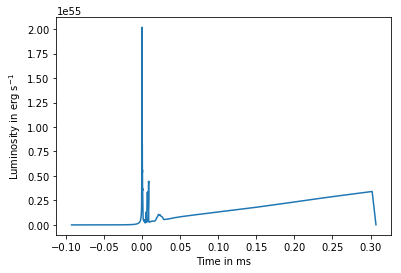

In [30]:
#Question 7

def delta( x ):
    l = []
    for i in range(len(x)-1):
        l.append(x[i+1]-x[i])
    l.append(1)
    return(np.asarray(l))
def func( x, a, b ):
    return( a * x + b )
#a
L_emit = data[12][:]/delta(data[0][:])
plt.plot(data[0][:], L_emit)
plt.xlabel("Time in ms")
plt.ylabel("Luminosity in erg s$^{-1}$")
#b
#popt, pcov = curve_fit(func, data[0][data[0][:]>=0.3], L_emit)
#plt.plot(data[0][data[0][:]>=0.3], func(data[0][data[0][:]>=0.3], *popt))

In [7]:
#Question 9

dataGR = read_in_data("SUPERNOVA_GR(1).fits")

ColDefs(
    name = 'time'; format = 'E'
    name = 'Rad'; format = 'E'
    name = 'Ent'; format = 'E'
    name = 'Den'; format = 'E'
    name = 'Ye'; format = 'E'
    name = 'Yl'; format = 'E'
    name = 'Enue'; format = 'E'
    name = 'Enuebar'; format = 'E'
    name = 'Lnue'; format = 'D'
    name = 'Lnuebar'; format = 'D'
    name = 'Rshock'; format = 'E'
    name = 'Ekin'; format = 'D'
    name = 'Eemit'; format = 'D'
)
